<a href="https://colab.research.google.com/github/ANGEL201985/ANGEL201985/blob/main/Taller_Capacidad_Portante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Nc,Nq,Nγ,Sc,Sq,Sγ,dc,dq,dγ,ic,iq,iγ,qu(kg/cm2),qadm(kg/cm2)
1,33.76,21.61,27.60,1.32,1.31,0.80,1.20,1.14,1.00,1.32,1.31,1.00,10.47,3.49


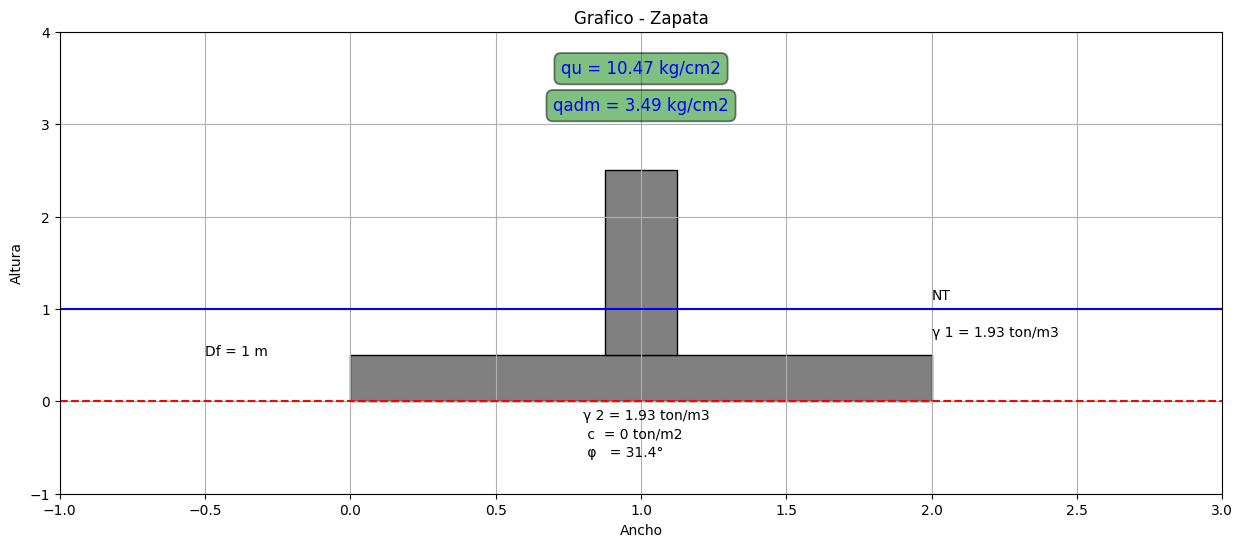

In [43]:
import matplotlib.pyplot as plt
import math
import pandas as pd
from IPython.display import HTML
from IPython.core.display import display

#Definiendo los datos de entrada

datos = {"ancho_cimentacion": 2, "largo_cimentacion": 4, "Df": 1, "peso_unitario_1":1.93, "peso_unitario_2": 1.93,
"angulo_friccion":31.40, "cohesion":0, "factor_seguridad": 3, "inclinacion_carga":0, "forma_cimentacion": "rectangular"}

#Definimos las funciones para la capacidad de carga
def factores_capacidad_carga(angulo_friccion):
  ang_rad = math.radians(angulo_friccion)
  Nq = pow(math.e, math.pi*math.tan(ang_rad))*pow(math.tan(math.radians(45+ angulo_friccion/2)),2)
  Nc = (1/math.tan(ang_rad))*(Nq -1)
  N_gamma = 2*math.tan(ang_rad)*(Nq + 1)
  return Nc, Nq, N_gamma

def factores_forma(forma, ancho, largo, Nc, Nq, ang_rad):
  if forma == "rectangular":
    Sc = 1 + (Nq/Nc)*(ancho/largo)
    Sq = 1 + math.tan(ang_rad)*(ancho/largo)
    S_gamma = 1 - 0.4*(ancho/largo)

  elif forma in ["circular", " cuadrado"]:
    Sc = 1 + (Nq/Nc)
    Sq = 1 + math.tan(ang_rad)
    S_gamma = 0.60

  return Sc, Sq, S_gamma

def factores_profundidad(Df, ancho, ang_rad):
   k = Df/ancho if Df/ancho <=1 else math.atan(Df/ancho)
   dc = 1 + 0.4*k
   dq = 1 + 2*math.tan(ang_rad)*(1-math.sin(ang_rad))**2*k
   d_gamma = 1

   return dc, dq, d_gamma

def factores_inclinacion(inclinacion_carga, angulo_friccion):
  ic = iq = (1 -inclinacion_carga/90)**2
  i_gamma = (1 - inclinacion_carga/angulo_friccion)**2
  return ic,iq,i_gamma

# Llamando las funciones para calculas los factores respectivos
Nc, Nq, N_gamma = factores_capacidad_carga(datos["angulo_friccion"])
#print(f'Los factores de capacidad de carga son: Nc = {Nc}, Nq = {Nq}, N_gamma = {N_gamma}')
Sc, Sq, S_gamma = factores_forma(datos["forma_cimentacion"], datos["ancho_cimentacion"], datos["largo_cimentacion"], Nc, Nq, math.radians(datos["angulo_friccion"]))
#print(f'Los factores de forma son: Sc = {Sc}, Sq = {Sq}, S_gamma = {S_gamma}')
dc, dq, d_gamma = factores_profundidad(datos["Df"], datos["ancho_cimentacion"], math.radians(datos["angulo_friccion"]))
#print(f'Los factores de profundidad son: dc = {dc}, dq = {dq}, d_gamma = {d_gamma}')
ic, iq, i_gamma = factores_inclinacion(datos["inclinacion_carga"], datos["angulo_friccion"])
#print(f'Los factores de inclinacion son: ic = {ic}, iq = {iq}, i_gamma = {i_gamma}')

# Calculando la capacidad de carga ultima y admisible
qu = round((datos["cohesion"]*Nc*Sc*dc*ic + datos["Df"]*datos["peso_unitario_1"]*Nq*Sq*dq*iq +
0.5*datos["peso_unitario_2"]*datos["ancho_cimentacion"]*N_gamma*S_gamma*d_gamma*i_gamma)/10,2)
#print(f'El valor de la capacidad de carga ultimo es : {qu} en kg/cm2')
qadm = round(qu/datos["factor_seguridad"],2)
#print(f'El valor de la capacidad de carga admisible es : {qadm} en kg/cm2')
#Crearemos un dicionario con los resultados
calculos = {'Nc': Nc, 'Nq':Nq, 'N\u03B3':N_gamma, 'Sc':Sc, 'Sq':Sq, 'S\u03B3':S_gamma, 'dc':dc, 'dq':dq, 'd\u03B3':d_gamma,
            'ic':Sc, 'iq':Sq, 'i\u03B3':i_gamma,'qu(kg/cm2)': qu, 'qadm(kg/cm2)':qadm}

#Creamos nuestro Datafarme
df_calculos = pd.DataFrame(calculos, index =[1])
#print(df_calculos)

tabla_estilos = (
    df_calculos.style
    .map(lambda val: 'background-color: lightgreen' if isinstance(val, (int, float)) else '')  # Aplica fondo verde a valores numéricos
    .format("{:.2f}")  # Formatea los valores numéricos con dos decimales
    .set_caption("Tabla de Resultados")  # Agrega un título
    .set_table_styles(
        [
            {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', 'black'), ('border', '1px solid gray'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('border', '1px solid gray'), ('padding', '5px'), ('text-align', 'center')]},
        ]
    )
)

# con HTML y el contenedor div centramos nuestro cuadro respecto al ancho.
display(HTML(f"""
<div style="display: flex; justify-content: center;">
    {tabla_estilos.to_html()}
</div>
"""))

#Construyendo nuestro grafico con matplotlib
fig, ax = plt.subplots(figsize = (15,6))
x_min = 1
x_max = datos["ancho_cimentacion"] + x_min
ax.set_xlim(-x_min,x_max)
ax.set_ylim(-1,4)
#Dibujando la zapata
zapata = plt.Rectangle((0,0), datos["ancho_cimentacion"], 0.5, linewidth = 1, edgecolor = 'black', facecolor = 'gray')
ax.add_patch(zapata)

ancho_columna = 0.25
columna = plt.Rectangle((datos["ancho_cimentacion"]/2 - ancho_columna/2, 0.5), ancho_columna, 2, linewidth = 1, edgecolor = 'black', facecolor = 'gray')
ax.add_patch(columna)

ax.set_xlabel('Ancho')
ax.set_ylabel('Altura')
ax.set_title('Grafico - Zapata')

plt.plot([-1, 3],[datos["Df"], datos["Df"]], 'b')
plt.plot([-1, 3],[0, 0], 'r--')
plt.text(datos["ancho_cimentacion"], 0.7, f'\u03B3 1 = {datos["peso_unitario_1"]} ton/m3')
plt.text(datos["ancho_cimentacion"], 1.1, 'NT')
plt.text(-0.5, 0.5, f'Df = {datos["Df"]} m')
plt.text(datos["ancho_cimentacion"]/2 - 0.2, -0.2, f'\u03B3 2 = {datos["peso_unitario_2"]} ton/m3')
plt.text(datos["ancho_cimentacion"]/2 - 0.2, -0.4, f' c  = {datos["cohesion"]} ton/m2')
plt.text(datos["ancho_cimentacion"]/2 - 0.2, -0.6, f' \u03C6   = {datos["angulo_friccion"]}°')



estilo_caja = dict(boxstyle = "round, pad = 0.4", edgecolor = "black", facecolor = "green", alpha = 0.5, lw = 1.3)
plt.text (datos['ancho_cimentacion']/2, 3.6, f'qu = {qu} kg/cm2', va = "center", ha = "center", fontsize = 12,color = 'blue', bbox = estilo_caja  )
plt.text (datos['ancho_cimentacion']/2, 3.2, f'qadm = {qadm} kg/cm2',  va = "center", ha = "center", fontsize = 12,color = 'blue', bbox = estilo_caja)


plt.grid()
plt.show()


